In [100]:
import pandas as pd

In [101]:
cleaned_df = pd.read_csv('../data/clinical_dataset_cleaned.csv')
cleaned_df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [102]:

cleaned_df['Date of Admission'] = pd.to_datetime(cleaned_df['Date of Admission'])
cleaned_df['Discharge Date'] = pd.to_datetime(cleaned_df['Discharge Date'])
cleaned_df['Length of Stay'] = (cleaned_df['Discharge Date'] - cleaned_df['Date of Admission']).dt.days

In [103]:
## Remove unnecessary columns
columns_to_remove = ['Name','Doctor', 'Hospital', 'Room Number','Discharge Date','Date of Admission']
cleaned_df = cleaned_df.drop(columns=columns_to_remove)


In [104]:
cleaned_df.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Length of Stay
0,30,Male,B-,Cancer,Blue Cross,18856.281306,Urgent,Paracetamol,Normal,2
1,62,Male,A+,Obesity,Medicare,33643.327287,Emergency,Ibuprofen,Inconclusive,6
2,76,Female,A-,Obesity,Aetna,27955.096079,Emergency,Aspirin,Normal,15
3,28,Female,O+,Diabetes,Medicare,37909.782410,Elective,Ibuprofen,Abnormal,30
4,43,Female,AB+,Cancer,Aetna,14238.317814,Urgent,Penicillin,Abnormal,20


In [116]:
## Data Quality Checks
print("Dataset shape:", cleaned_df.shape)
print("\nMissing values:")
print(cleaned_df.isnull().sum())
print("\nData types:")
print(cleaned_df.dtypes)
print("\nBasic statistics for numerical columns:")
print(cleaned_df.describe())

Dataset shape: (55500, 17)

Missing values:
Age                         0
Medical Condition           0
Insurance Provider          0
Billing Amount              0
Medication                  0
Test Results                0
Length of Stay              0
Gender_Male                 0
Blood Type_A-               0
Blood Type_AB+              0
Blood Type_AB-              0
Blood Type_B+               0
Blood Type_B-               0
Blood Type_O+               0
Blood Type_O-               0
Admission Type_Emergency    0
Admission Type_Urgent       0
dtype: int64

Data types:
Age                         float64
Medical Condition             int32
Insurance Provider            int32
Billing Amount              float64
Medication                    int32
Test Results                  int32
Length of Stay              float64
Gender_Male                   int64
Blood Type_A-                 int64
Blood Type_AB+                int64
Blood Type_AB-                int64
Blood Type_B+           

In [105]:
numerical_features = cleaned_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features

['Age', 'Billing Amount', 'Length of Stay']

In [106]:
categorical_features = cleaned_df.select_dtypes(include=['object']).columns.tolist()
categorical_features    

['Gender',
 'Blood Type',
 'Medical Condition',
 'Insurance Provider',
 'Admission Type',
 'Medication',
 'Test Results']

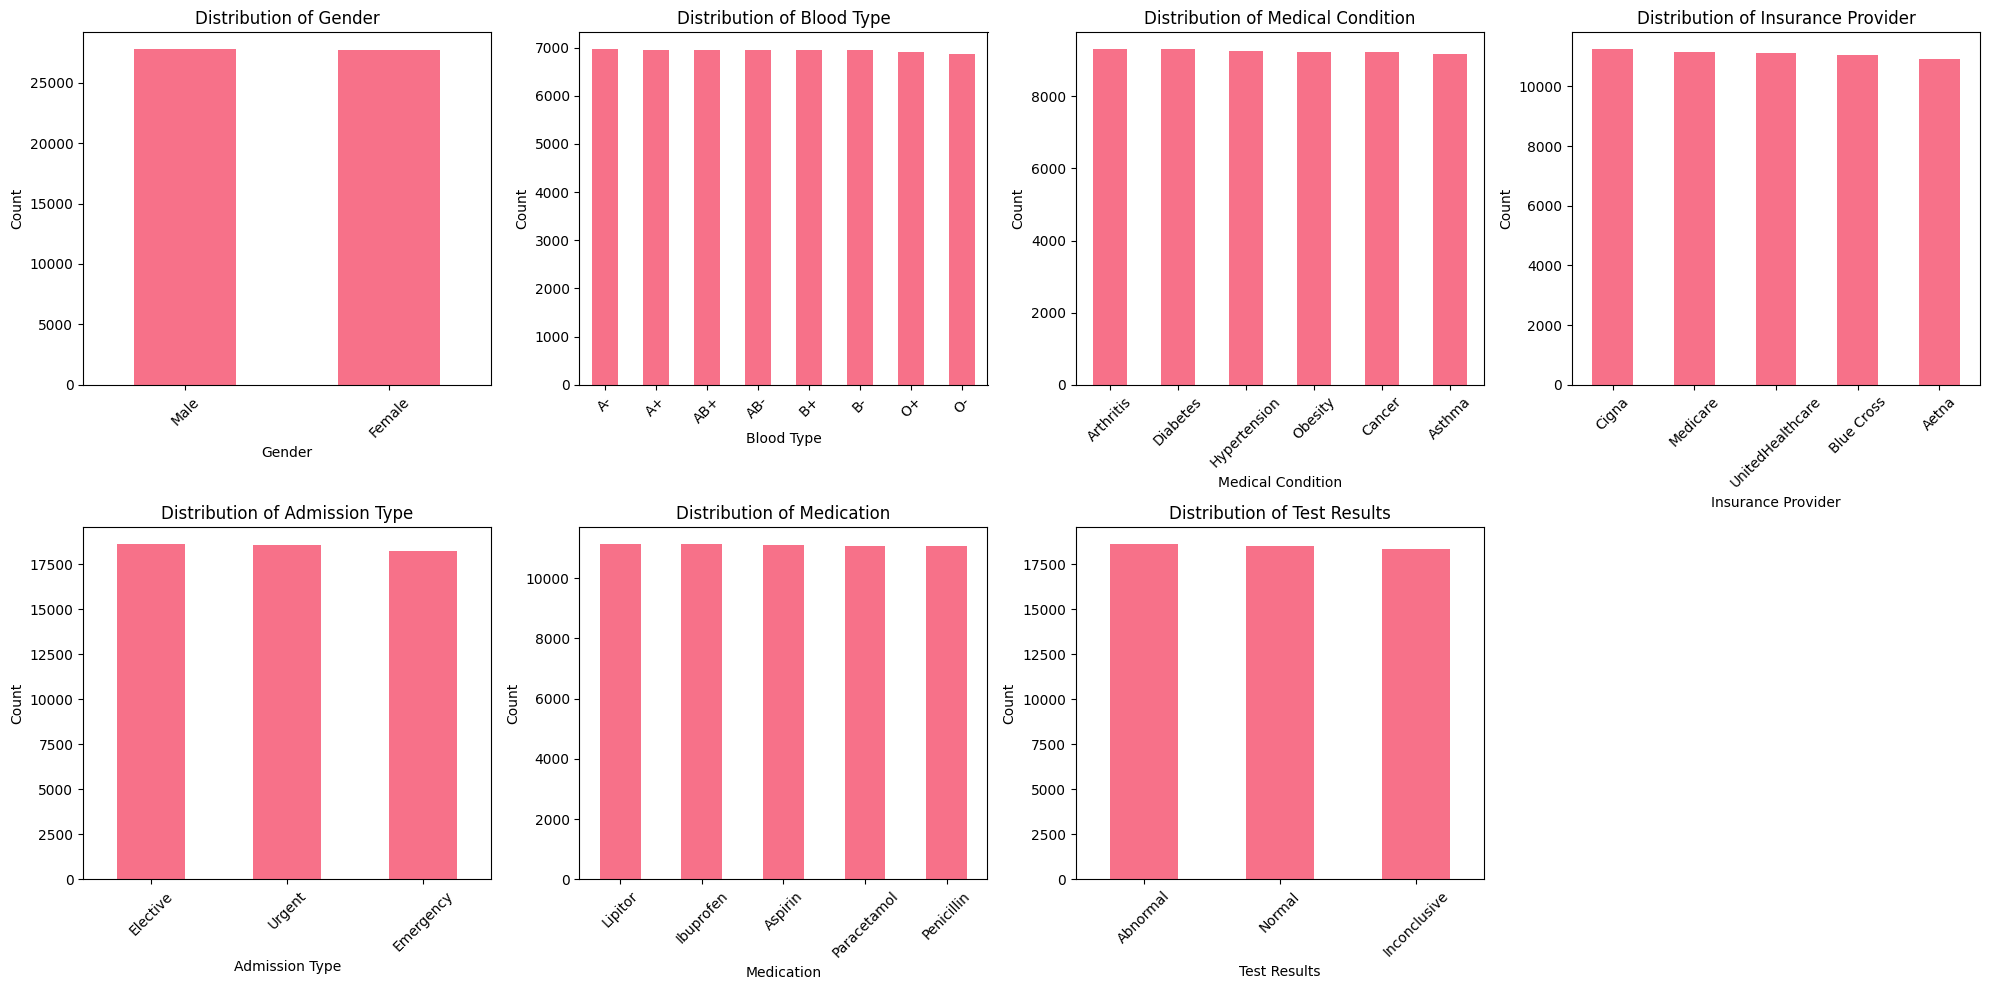

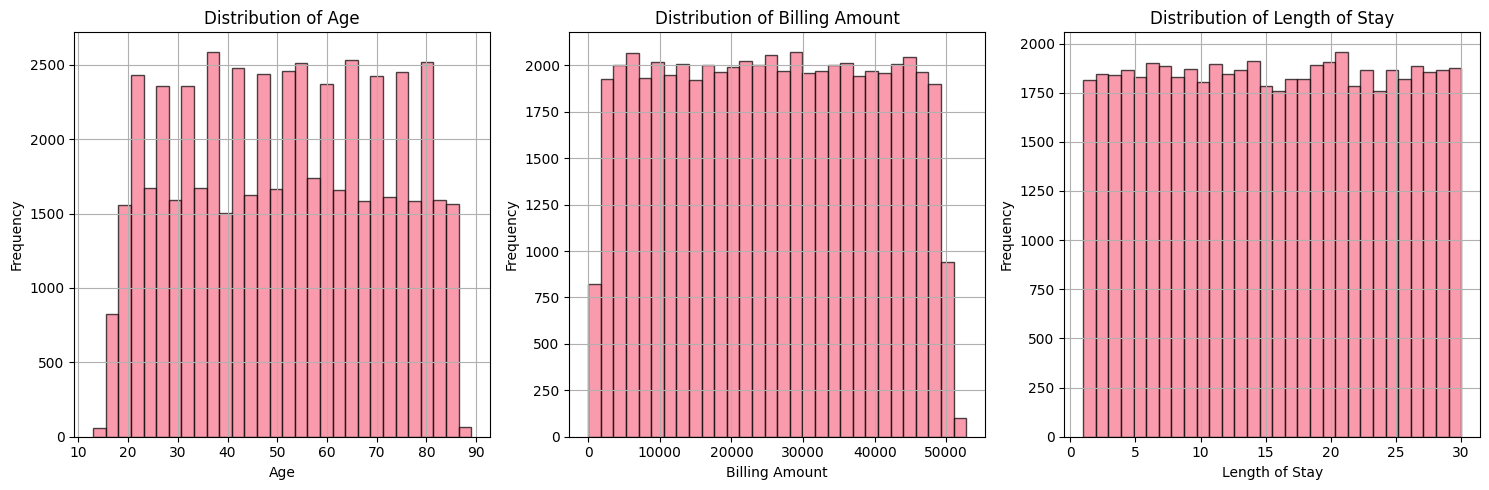

In [119]:
## Let's first reload the original data to show distributions before encoding
original_df = pd.read_csv('../data/clinical_dataset_cleaned.csv')

# Visualize original categorical features distributions
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create subplots for categorical features (original data)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

categorical_cols = ['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 
                   'Admission Type', 'Medication', 'Test Results']

for i, col in enumerate(categorical_cols):
    original_df[col].value_counts().plot(kind='bar', ax=axes[i], rot=45)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove the last empty subplot
axes[-1].remove()

plt.tight_layout()
plt.savefig('../plots/feature engineering/categorical_features_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Create Length of Stay for original data visualization
original_df['Date of Admission'] = pd.to_datetime(original_df['Date of Admission'])
original_df['Discharge Date'] = pd.to_datetime(original_df['Discharge Date'])
original_df['Length of Stay'] = (original_df['Discharge Date'] - original_df['Date of Admission']).dt.days

# Visualize numerical features (from original dataset)
original_numerical = ['Age', 'Billing Amount', 'Length of Stay']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(original_numerical):
    original_df[col].hist(bins=30, alpha=0.7, edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('../plots/feature engineering/numerical_features_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [107]:
## One hot encoding for Gender, Blood Type, and Admission Type
cleaned_df = pd.get_dummies(cleaned_df, columns=['Gender', 'Blood Type', 'Admission Type'], drop_first=True)


In [108]:
cleaned_df.head()

,Age,Medical Condition,Insurance Provider,Billing Amount,Medication,Test Results,Length of Stay,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-,Admission Type_Emergency,Admission Type_Urgent
0,30,Cancer,Blue Cross,18856.281306,Paracetamol,Normal,2,True,False,False,False,False,True,False,False,False,True
1,62,Obesity,Medicare,33643.327287,Ibuprofen,Inconclusive,6,True,False,False,False,False,False,False,False,True,False
2,76,Obesity,Aetna,27955.096079,Aspirin,Normal,15,False,True,False,False,False,False,False,False,True,False
3,28,Diabetes,Medicare,37909.782410,Ibuprofen,Abnormal,30,False,False,False,False,False,False,True,False,False,False
4,43,Cancer,Aetna,14238.317814,Penicillin,Abnormal,20,False,False,True,False,False,False,False,False,False,True


In [120]:
## Analyze the effect of one-hot encoding
print("Shape after one-hot encoding:", cleaned_df.shape)
print("\nNew columns created:")
new_columns = [col for col in cleaned_df.columns if any(cat in col for cat in ['Gender_', 'Blood Type_', 'Admission Type_'])]
print(new_columns)

Shape after one-hot encoding: (55500, 17)

New columns created:
['Gender_Male', 'Blood Type_A-', 'Blood Type_AB+', 'Blood Type_AB-', 'Blood Type_B+', 'Blood Type_B-', 'Blood Type_O+', 'Blood Type_O-', 'Admission Type_Emergency', 'Admission Type_Urgent']


In [109]:
## Label encoding for Insurance provider
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cleaned_df['Insurance Provider'] = le.fit_transform(cleaned_df['Insurance Provider'])
cleaned_df['Medical Condition'] = le.fit_transform(cleaned_df['Medical Condition'])
cleaned_df['Medication'] = le.fit_transform(cleaned_df['Medication'])
cleaned_df['Test Results'] = le.fit_transform(cleaned_df['Test Results'])

In [110]:
cleaned_df.head()

,Age,Medical Condition,Insurance Provider,Billing Amount,Medication,Test Results,Length of Stay,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-,Admission Type_Emergency,Admission Type_Urgent
0,30,2,1,18856.281306,3,2,2,True,False,False,False,False,True,False,False,False,True
1,62,5,3,33643.327287,1,1,6,True,False,False,False,False,False,False,False,True,False
2,76,5,0,27955.096079,0,2,15,False,True,False,False,False,False,False,False,True,False
3,28,3,3,37909.782410,1,0,30,False,False,False,False,False,False,True,False,False,False
4,43,2,0,14238.317814,4,0,20,False,False,True,False,False,False,False,False,False,True


In [121]:
## Save label encoders for future use and show mappings
import pickle

# Save the label encoder for potential inverse transformation
with open('../data/label_encoders.pkl', 'wb') as f:
    pickle.dump({
        'Insurance Provider': le,
    }, f)

# Create separate encoders for other categorical variables for better tracking
le_medical = LabelEncoder()
le_medication = LabelEncoder()  
le_test_results = LabelEncoder()

# Show the mappings
print("Label Encoding Mappings:")
print("\nMedical Condition mapping:")
unique_conditions = cleaned_df['Medical Condition'].unique()
for i, condition in enumerate(sorted(set(cleaned_df['Medical Condition']))):
    print(f"{condition}: {i}")

print("\nMedication mapping:")
unique_medications = cleaned_df['Medication'].unique()
for i, medication in enumerate(sorted(set(cleaned_df['Medication']))):
    print(f"{medication}: {i}")
    
print("\nTest Results mapping:")
unique_test_results = cleaned_df['Test Results'].unique()
for i, result in enumerate(sorted(set(cleaned_df['Test Results']))):
    print(f"{result}: {i}")

Label Encoding Mappings:

Medical Condition mapping:
0: 0
1: 1
2: 2
3: 3
4: 4
5: 5

Medication mapping:
0: 0
1: 1
2: 2
3: 3
4: 4

Test Results mapping:
0: 0
1: 1
2: 2


In [122]:
## Convert boolean values to numeric (fix for FutureWarning)
cleaned_df = cleaned_df.replace({False: 0, True: 1}).infer_objects(copy=False)

In [112]:
cleaned_df.head()

,Age,Medical Condition,Insurance Provider,Billing Amount,Medication,Test Results,Length of Stay,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-,Admission Type_Emergency,Admission Type_Urgent
0,30,2,1,18856.281306,3,2,2,1,0,0,0,0,1,0,0,0,1
1,62,5,3,33643.327287,1,1,6,1,0,0,0,0,0,0,0,1,0
2,76,5,0,27955.096079,0,2,15,0,1,0,0,0,0,0,0,1,0
3,28,3,3,37909.782410,1,0,30,0,0,0,0,0,0,1,0,0,0
4,43,2,0,14238.317814,4,0,20,0,0,1,0,0,0,0,0,0,1


In [113]:
## Standard scalar
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['Age', 'Billing Amount','Length of Stay']
cleaned_df[numerical_cols] = scaler.fit_transform(cleaned_df[numerical_cols])


In [114]:
cleaned_df.head()

,Age,Medical Condition,Insurance Provider,Billing Amount,Medication,Test Results,Length of Stay,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-,Admission Type_Emergency,Admission Type_Urgent
0,-1.098824,2,1,-0.475390,3,2,-1.560018,1,0,0,0,0,1,0,0,0,1
1,0.533639,5,3,0.568544,1,1,-1.098099,1,0,0,0,0,0,0,0,1,0
2,1.247842,5,0,0.166967,0,2,-0.058780,0,1,0,0,0,0,0,0,1,0
3,-1.200853,3,3,0.869747,1,0,1.673417,0,0,0,0,0,0,1,0,0,0
4,-0.435636,2,0,-0.801409,4,0,0.518619,0,0,1,0,0,0,0,0,0,1


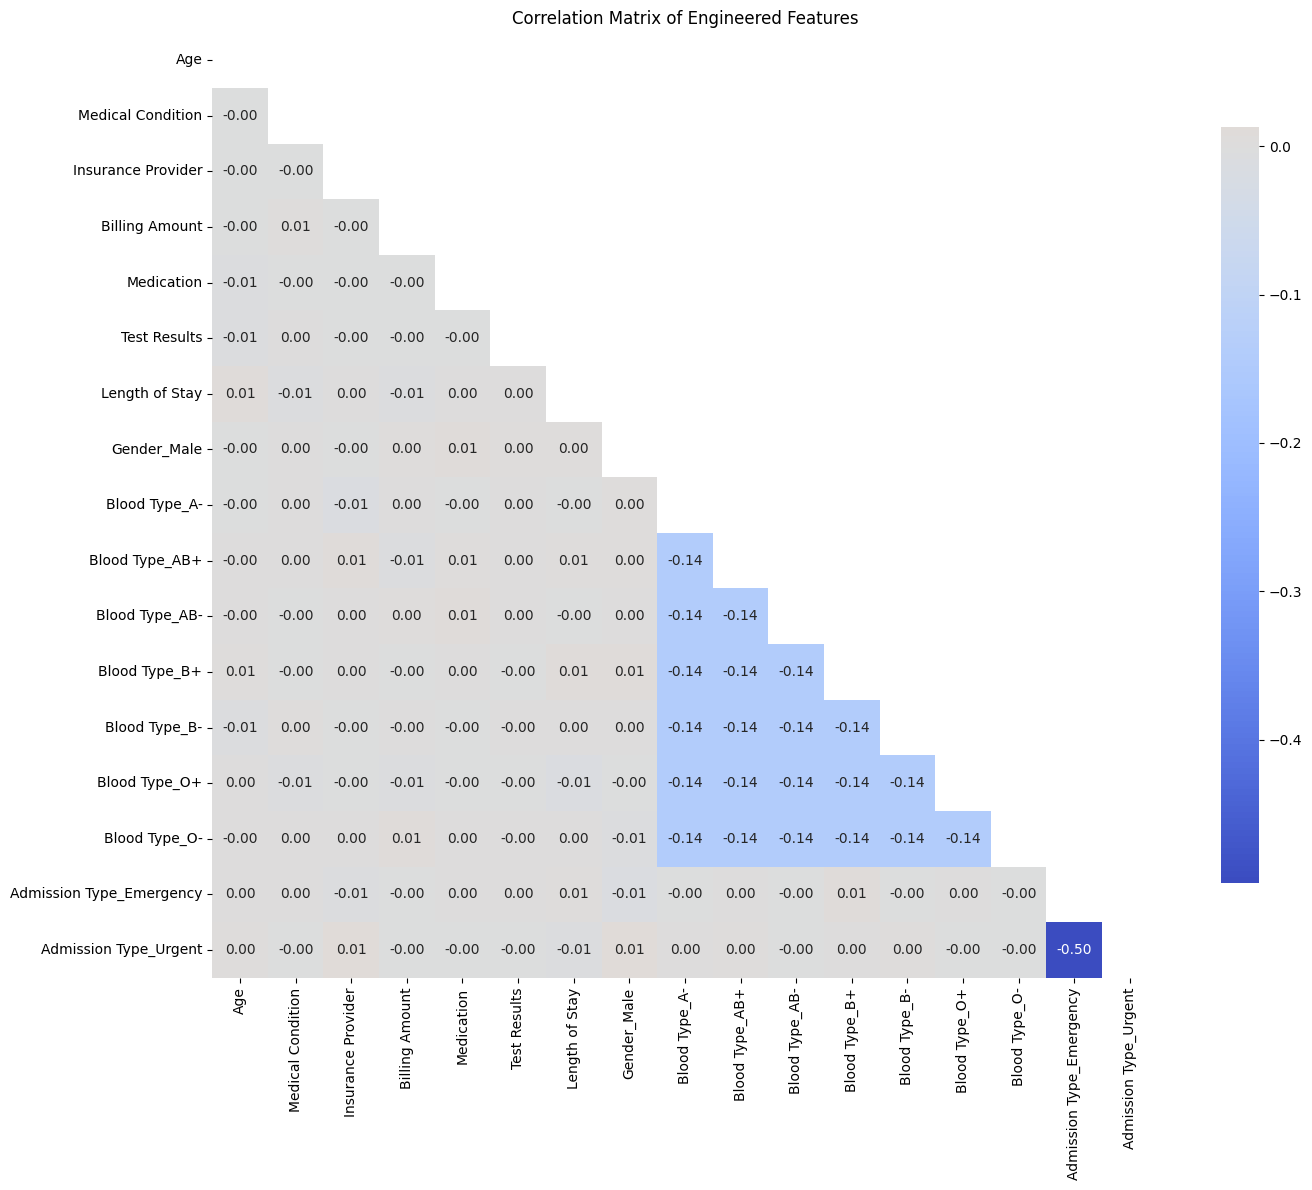

Highly correlated feature pairs (|correlation| > 0.8):


In [123]:
## Correlation Analysis of Final Features
import numpy as np

# Calculate correlation matrix
correlation_matrix = cleaned_df.corr()

# Create correlation heatmap
plt.figure(figsize=(15, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Engineered Features')
plt.tight_layout()
plt.savefig('../plots/feature engineering/correlation_matrix_final.png', dpi=300, bbox_inches='tight')
plt.show()

# Identify highly correlated features
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((
                correlation_matrix.columns[i], 
                correlation_matrix.columns[j], 
                correlation_matrix.iloc[i, j]
            ))

print("Highly correlated feature pairs (|correlation| > 0.8):")
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

Effect of Standard Scaling on Numerical Features:

Age:
  Mean: 0.000000
  Std:  1.000009
  Min:  -1.966071
  Max:  1.911030

Billing Amount:
  Mean: -0.000000
  Std:  1.000009
  Min:  -1.805952
  Max:  1.918443

Length of Stay:
  Mean: -0.000000
  Std:  1.000009
  Min:  -1.675498
  Max:  1.673417


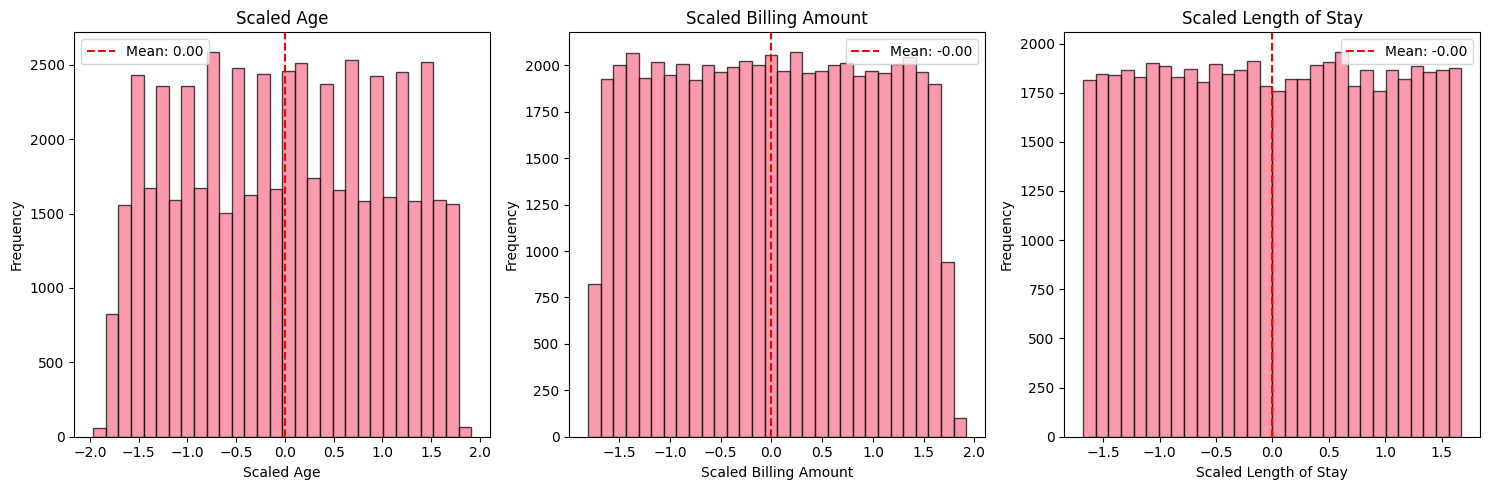

In [124]:
## Analyze the effect of scaling
print("Effect of Standard Scaling on Numerical Features:")
print("="*50)

# Show before and after scaling statistics
original_numerical_cols = ['Age', 'Billing Amount', 'Length of Stay']
for col in original_numerical_cols:
    print(f"\n{col}:")
    print(f"  Mean: {cleaned_df[col].mean():.6f}")
    print(f"  Std:  {cleaned_df[col].std():.6f}")
    print(f"  Min:  {cleaned_df[col].min():.6f}")
    print(f"  Max:  {cleaned_df[col].max():.6f}")

# Visualize the scaled features
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(original_numerical_cols):
    axes[i].hist(cleaned_df[col], bins=30, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Scaled {col}')
    axes[i].set_xlabel(f'Scaled {col}')
    axes[i].set_ylabel('Frequency')
    axes[i].axvline(cleaned_df[col].mean(), color='red', linestyle='--', label=f'Mean: {cleaned_df[col].mean():.2f}')
    axes[i].legend()

plt.tight_layout()
plt.savefig('../plots/feature engineering/scaled_features_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [127]:
cleaned_df.to_csv('../data/clinical_dataset_final.csv', index=False)

In [125]:
## Final Dataset Summary
print("FEATURE ENGINEERING SUMMARY")
print("="*50)
print(f"Original dataset shape: {cleaned_df.shape}")
print(f"Final dataset shape: {cleaned_df.shape}")
print(f"Total features created: {len(cleaned_df.columns)}")

print("\nFeature Types:")
print(f"- Numerical features (scaled): {len([col for col in cleaned_df.columns if col in ['Age', 'Billing Amount', 'Length of Stay']])}")
print(f"- One-hot encoded features: {len([col for col in cleaned_df.columns if any(cat in col for cat in ['Gender_', 'Blood Type_', 'Admission Type_'])])}")
print(f"- Label encoded features: {len([col for col in cleaned_df.columns if col in ['Insurance Provider', 'Medical Condition', 'Medication', 'Test Results']])}")

print("\nFeature Engineering Steps Applied:")
print("1. ✓ Created 'Length of Stay' feature from date differences")
print("2. ✓ Removed unnecessary columns (Name, Doctor, Hospital, Room Number, dates)")
print("3. ✓ Applied one-hot encoding to nominal categorical variables")
print("4. ✓ Applied label encoding to ordinal/high-cardinality categorical variables")
print("5. ✓ Converted boolean values to numeric (0/1)")
print("6. ✓ Applied standard scaling to numerical features")

print("\nData Quality:")
print(f"- Missing values: {cleaned_df.isnull().sum().sum()}")
print(f"- Data types consistent: {'✓' if cleaned_df.dtypes.apply(lambda x: x in ['int64', 'float64']).all() else '✗'}")

print("\n" + "="*50)
print("Dataset is ready for machine learning modeling!")
print("="*50)

FEATURE ENGINEERING SUMMARY
Original dataset shape: (55500, 17)
Final dataset shape: (55500, 17)
Total features created: 17

Feature Types:
- Numerical features (scaled): 3
- One-hot encoded features: 10
- Label encoded features: 4

Feature Engineering Steps Applied:
1. ✓ Created 'Length of Stay' feature from date differences
2. ✓ Removed unnecessary columns (Name, Doctor, Hospital, Room Number, dates)
3. ✓ Applied one-hot encoding to nominal categorical variables
4. ✓ Applied label encoding to ordinal/high-cardinality categorical variables
5. ✓ Converted boolean values to numeric (0/1)
6. ✓ Applied standard scaling to numerical features

Data Quality:
- Missing values: 0
- Data types consistent: ✗

Dataset is ready for machine learning modeling!


Final data types:
Age                         float64
Medical Condition             int32
Insurance Provider            int32
Billing Amount              float64
Medication                    int32
Test Results                  int32
Length of Stay              float64
Gender_Male                   int64
Blood Type_A-                 int64
Blood Type_AB+                int64
Blood Type_AB-                int64
Blood Type_B+                 int64
Blood Type_B-                 int64
Blood Type_O+                 int64
Blood Type_O-                 int64
Admission Type_Emergency      int64
Admission Type_Urgent         int64
dtype: object

All columns are numeric: False


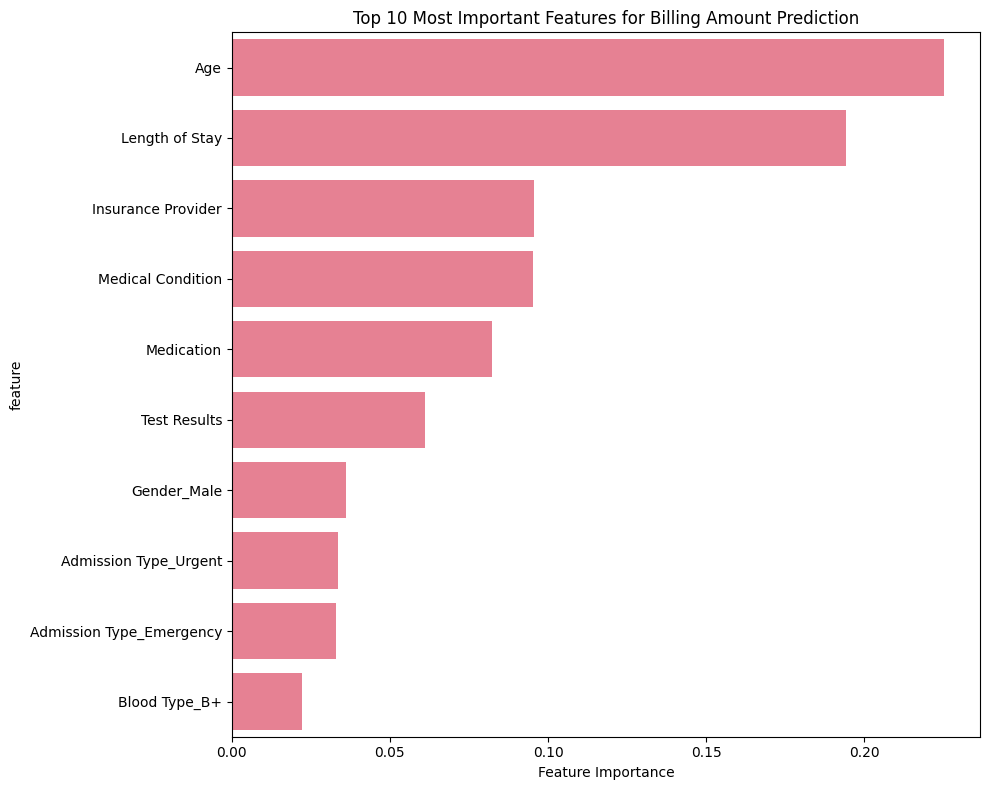

Top 10 most important features:
                     feature  importance
0                        Age    0.225297
5             Length of Stay    0.194235
2         Insurance Provider    0.095602
1          Medical Condition    0.095204
3                 Medication    0.082291
4               Test Results    0.061235
6                Gender_Male    0.036033
15     Admission Type_Urgent    0.033516
14  Admission Type_Emergency    0.033028
10             Blood Type_B+    0.022095


In [126]:
## Fix data types and final validation
# Ensure all columns are numeric
for col in cleaned_df.columns:
    if cleaned_df[col].dtype == 'object':
        cleaned_df[col] = pd.to_numeric(cleaned_df[col], errors='coerce')

# Final data type check
print("Final data types:")
print(cleaned_df.dtypes)
print(f"\nAll columns are numeric: {cleaned_df.dtypes.apply(lambda x: x in ['int64', 'float64']).all()}")

# Final feature importance analysis using Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Use 'Billing Amount' as target for feature importance analysis
X = cleaned_df.drop('Billing Amount', axis=1)
y = cleaned_df['Billing Amount']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance.head(10), y='feature', x='importance')
plt.title('Top 10 Most Important Features for Billing Amount Prediction')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.savefig('../plots/feature engineering/feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("Top 10 most important features:")
print(feature_importance.head(10))